<center><img src="https://github.com/Magallanes-at-UTDT/DataViz_ShortTalk/blob/main/LogoTaller_viz.png?raw=true" width="1000"></center>

# A COSPONSORSHIP STORY

In this example we will take a look to a network that represents cosponsorship, let me show you a net from the period "July 1995-July 1996".

Let's fetch the data first:

In [1]:
# fetch the file (this will appear in your main folder after running the code)
# just do it once!
!wget 'https://github.com/Magallanes-at-UTDT/DataViz_shortTalk_3/raw/main/cospon_9596.gexf'

--2024-07-29 18:28:30--  https://github.com/Magallanes-at-UTDT/DataViz_shortTalk_3/raw/main/cospon_9596.gexf
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Magallanes-at-UTDT/DataViz_shortTalk_3/main/cospon_9596.gexf [following]
--2024-07-29 18:28:31--  https://raw.githubusercontent.com/Magallanes-at-UTDT/DataViz_shortTalk_3/main/cospon_9596.gexf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308578 (301K) [text/plain]
Saving to: ‘cospon_9596.gexf’

cospon_9596.gexf    100%[===================>] 301.35K  --.-KB/s    in 0.01s   

2024-07-29 18:28:31 (22.0 MB/s) - ‘cospon_9596.gexf’ saved [308

Now, let's read the file and show the relationships

In [2]:
import networkx as nx

# read in the data
net95_1=nx.read_gexf("cospon_9596.gexf")


# show net adjacency as a pandas data frame
nx.to_pandas_adjacency(net95_1)

00046218  07238522  08201401  05847587  32785850  19833343  \
00046218       0.0       2.0       1.0       4.0       1.0       1.0   
07238522       2.0       0.0       2.0       1.0       2.0       0.0   
08201401       1.0       2.0       0.0       2.0       2.0       0.0   
05847587       4.0       1.0       2.0       0.0       1.0       1.0   
32785850       1.0       2.0       2.0       1.0       0.0       1.0   
...            ...       ...       ...       ...       ...       ...   
07586258       2.0       2.0       3.0       1.0       3.0       0.0   
07194374       0.0       0.0       2.0       0.0       3.0       1.0   
08772985       0.0       0.0       0.0       0.0       0.0       0.0   
29233392       3.0       1.0       1.0       1.0       4.0       1.0   
17906056       2.0       0.0       0.0       1.0       0.0       0.0   

          00013944  07960843  09179807  21082125  ...  08260934  16437772  \
00046218       5.0       1.0       1.0       3.0  ...       3.0       4.0   
07238522       1.0       0.0       0.0       0.0  ...       2.0       1.0   
08201401       1.0       0.0       0.0       0.0  ...       1.0       1.0   
05847587       3.0       1.0       0.0       0.0  ...       1.0       5.0   
32785850       2.0       0.0       0.0       0.0  ...       1.0       1.0   
...            ...       ...       ...       ...  ...       ...       ...   
07586258       1.0       0.0       0.0       1.0  ...       1.0       2.0   
07194374       1.0       0.0       1.0       0.0  ...       0.0       0.0   
08772985       0.0       0.0       0.0       0.0  ...       0.0       0.0   
29233392       4.0       0.0       1.0       1.0  ...       1.0       2.0   
17906056       1.0       1.0       0.0       1.0  ...       0.0       3.0   

          07799019  10315984  07812880  07586258  07194374  08772985  \
00046218       0.0       2.0       0.0       2.0       0.0       0.0   
07238522       0.0       0.0       8.0       2.0       0.0       0.0   
08201401       2.0       1.0       0.0       3.0       2.0       0.0   
05847587       0.0       1.0       0.0       1.0       0.0       0.0   
32785850       0.0       0.0       0.0       3.0       3.0       0.0   
...            ...       ...       ...       ...       ...       ...   
07586258       0.0       1.0       1.0       0.0       0.0       0.0   
07194374       2.0       0.0       0.0       0.0       0.0       0.0   
08772985       0.0       0.0       0.0       0.0       0.0       0.0   
29233392       0.0       1.0       0.0       1.0       5.0       0.0   
17906056       0.0       1.0       0.0       0.0       0.0       0.0   

          29233392  17906056  
00046218       3.0       2.0  
07238522       1.0       0.0  
08201401       1.0       0.0  
05847587       1.0       1.0  
32785850       4.0       0.0  
...            ...       ...  
07586258       1.0       0.0  
07194374       5.0       0.0  
08772985       0.0       0.0  
29233392       0.0       0.0  
17906056       0.0       0.0  

[120 rows x 120 columns]

The adjacency tells us how many times TWO legislators appear as supporters of a bill proposal. The rows and columns names represent the legislator's code. Zero means they never supported a bill together during the time the information was collected (notice the zeroes in the diagonal). The existence of value greater than zero means there is a link between two legislators, and the value is the weight of that relationship.

Besides links (or edges) there are nodes, which represent the legislators. We have some attributes in those nodes:

In [3]:
import pandas as pd

pd.DataFrame.from_dict(net95_1.nodes, orient='index')

votes  weightCurrentGroup region  counter  experience  \
00046218   7975.0               0.558     NA       12         0.0   
07238522   8304.0               0.142     NA       25         0.0   
08201401   7791.0               0.058     NA       85         2.0   
05847587   8436.0               0.558     NA       23         0.0   
32785850   6866.0               0.058     NA       50         1.0   
...           ...                 ...    ...      ...         ...   
07586258   6204.0               0.050     NA       17         0.0   
07194374   7354.0               0.558     NA       23         1.0   
08772985  12158.0               0.050     NA       21         4.0   
29233392  15353.0               0.558     NA       13         0.0   
17906056  11490.0               0.558     NA       23         2.0   

          experience_true  votesPerc  capital  \
00046218                0   0.002906        0   
07238522                0   0.003026        0   
08201401                1   0.002839        0   
05847587                0   0.003074        0   
32785850                1   0.002502        0   
...                   ...        ...      ...   
07586258                0   0.002261        0   
07194374                1   0.002680        0   
08772985                1   0.004430        0   
29233392                0   0.005595        0   
17906056                1   0.004187        0   

                                     currentGroup  \
00046218                                CAMBIO 90   
07238522                        UNION POR EL PERU   
08201401  COORDINADORA DEMOCRATICA-ACCION POPULAR   
05847587                                CAMBIO 90   
32785850  COORDINADORA DEMOCRATICA-ACCION POPULAR   
...                                           ...   
07586258                 GRUPO PARLAMENTARIO PERU   
07194374                                CAMBIO 90   
08772985     PARTIDO POPULAR CRISTIANO-RENOVACION   
29233392                                CAMBIO 90   
17906056                                CAMBIO 90   

                                     party                        startGroup  \
00046218         CAMBIO 90 - NUEVA MAYORIA                         CAMBIO 90   
07238522                 UNION POR EL PERU                 UNION POR EL PERU   
08201401                    ACCION POPULAR                    ACCION POPULAR   
05847587         CAMBIO 90 - NUEVA MAYORIA                         CAMBIO 90   
32785850               CODE - PAIS POSIBLE                      PAIS POSIBLE   
...                                    ...                               ...   
07586258  MOVIMIENTO CIVICO NACIONAL OBRAS  MOVIMIENTO CIVICO NACIONAL OBRAS   
07194374         CAMBIO 90 - NUEVA MAYORIA                         CAMBIO 90   
08772985                        RENOVACION                        RENOVACION   
29233392         CAMBIO 90 - NUEVA MAYORIA                         CAMBIO 90   
17906056         CAMBIO 90 - NUEVA MAYORIA                         CAMBIO 90   

          weightStartGroup                              label  
00046218          0.558333           JHONG JUNCHAYA JUAN JOSE  
07238522          0.141667  GUERRA GARCIA CUEVA ROGER ANTENOR  
08201401          0.033333      ALVA ORLANDINI JAVIER ERNESTO  
05847587          0.558333          CAMPOS BACA LUIS ESEQUIEL  
32785850          0.041667             CHU RUBIO LUIS ALBERTO  
...                    ...                                ...  
07586258          0.016667       LAJO LAZO MANUEL CONSTANTINO  
07194374          0.558333              AMURUZ GALLEGOS ROGER  
08772985          0.025000              CHIRINOS SOTO ENRIQUE  
29233392          0.558333     FERNANDEZ BUSTINZA VICTOR RAUL  
17906056          0.558333           BARRETO ESTRADA GAMALIEL  

[120 rows x 13 columns]

# <div class="alert alert-success" role="alert">Relevant nodes</div>
Let's compute some important measures that seek to identify actors whose relationship patterns may make them relevant in the network:

In [4]:
# relevant to connect groups
nx.set_node_attributes(net95_1, nx.betweenness_centrality(net95_1), "betweenness")
# relevant to spread information
nx.set_node_attributes(net95_1, nx.closeness_centrality(net95_1), "closeness")
# connected to well connected nodes
nx.set_node_attributes(net95_1, nx.eigenvector_centrality(net95_1), "eigenvector")

You see those values as new columns here:

In [5]:
net95_1_NodeData=pd.DataFrame.from_dict(net95_1.nodes, orient='index')
net95_1_NodeData

votes  weightCurrentGroup region  counter  experience  \
00046218   7975.0               0.558     NA       12         0.0   
07238522   8304.0               0.142     NA       25         0.0   
08201401   7791.0               0.058     NA       85         2.0   
05847587   8436.0               0.558     NA       23         0.0   
32785850   6866.0               0.058     NA       50         1.0   
...           ...                 ...    ...      ...         ...   
07586258   6204.0               0.050     NA       17         0.0   
07194374   7354.0               0.558     NA       23         1.0   
08772985  12158.0               0.050     NA       21         4.0   
29233392  15353.0               0.558     NA       13         0.0   
17906056  11490.0               0.558     NA       23         2.0   

          experience_true  votesPerc  capital  \
00046218                0   0.002906        0   
07238522                0   0.003026        0   
08201401                1   0.002839        0   
05847587                0   0.003074        0   
32785850                1   0.002502        0   
...                   ...        ...      ...   
07586258                0   0.002261        0   
07194374                1   0.002680        0   
08772985                1   0.004430        0   
29233392                0   0.005595        0   
17906056                1   0.004187        0   

                                     currentGroup  \
00046218                                CAMBIO 90   
07238522                        UNION POR EL PERU   
08201401  COORDINADORA DEMOCRATICA-ACCION POPULAR   
05847587                                CAMBIO 90   
32785850  COORDINADORA DEMOCRATICA-ACCION POPULAR   
...                                           ...   
07586258                 GRUPO PARLAMENTARIO PERU   
07194374                                CAMBIO 90   
08772985     PARTIDO POPULAR CRISTIANO-RENOVACION   
29233392                                CAMBIO 90   
17906056                                CAMBIO 90   

                                     party                        startGroup  \
00046218         CAMBIO 90 - NUEVA MAYORIA                         CAMBIO 90   
07238522                 UNION POR EL PERU                 UNION POR EL PERU   
08201401                    ACCION POPULAR                    ACCION POPULAR   
05847587         CAMBIO 90 - NUEVA MAYORIA                         CAMBIO 90   
32785850               CODE - PAIS POSIBLE                      PAIS POSIBLE   
...                                    ...                               ...   
07586258  MOVIMIENTO CIVICO NACIONAL OBRAS  MOVIMIENTO CIVICO NACIONAL OBRAS   
07194374         CAMBIO 90 - NUEVA MAYORIA                         CAMBIO 90   
08772985                        RENOVACION                        RENOVACION   
29233392         CAMBIO 90 - NUEVA MAYORIA                         CAMBIO 90   
17906056         CAMBIO 90 - NUEVA MAYORIA                         CAMBIO 90   

          weightStartGroup                              label  betweenness  \
00046218          0.558333           JHONG JUNCHAYA JUAN JOSE     0.008172   
07238522          0.141667  GUERRA GARCIA CUEVA ROGER ANTENOR     0.009132   
08201401          0.033333      ALVA ORLANDINI JAVIER ERNESTO     0.006847   
05847587          0.558333          CAMPOS BACA LUIS ESEQUIEL     0.018071   
32785850          0.041667             CHU RUBIO LUIS ALBERTO     0.011287   
...                    ...                                ...          ...   
07586258          0.016667       LAJO LAZO MANUEL CONSTANTINO     0.009202   
07194374          0.558333              AMURUZ GALLEGOS ROGER     0.003429   
08772985          0.025000              CHIRINOS SOTO ENRIQUE     0.000057   
29233392          0.558333     FERNANDEZ BUSTINZA VICTOR RAUL     0.012056   
17906056          0.558333           BARRETO ESTRADA GAMALIEL     0.002558   

          closeness  eigenvector  
00046218   0.753165     

We could use a scatter plot:

In [6]:
#updating altair in colab
# !pip install altair -U

In [7]:
import altair as alt

ALT_net=alt.Chart(net95_1_NodeData).properties(width=300,
                                               height=300)

ENC_net=ALT_net.encode(
    alt.X('betweenness'),
    alt.Y('closeness'),
    alt.Size("eigenvector:Q"),
    alt.Color("eigenvector:Q"),
    tooltip=['label','party']
).interactive()
ENC_net.mark_circle()

alt.Chart(...)

Let me create add another attribute, to show belonging to a the governing party:

In [8]:
isPartyInGov={l:1 if p=='CAMBIO 90 - NUEVA MAYORIA' else 0 for (l,p) in nx.get_node_attributes(net95_1, 'party').items()}
nx.set_node_attributes(net95_1, isPartyInGov,'isPartyInGov')
net95_1_NodeData=pd.DataFrame.from_dict(net95_1.nodes, orient='index')

In [9]:
ALT_net=alt.Chart(net95_1_NodeData).properties(width=300,
                                               height=300)

ENC_net=ALT_net.encode(
    alt.X('betweenness'),
    alt.Y('closeness'),
    alt.Size("eigenvector:Q").scale(range=[10, 300]),
    alt.Color('isPartyInGov:N'),
    tooltip=['label','party']
).interactive()

ENC_net.mark_circle()

alt.Chart(...)

Networks are complex to visualize, then some combination of plots may help. Let me introduce **brushing**:

In [10]:
brush = alt.selection_interval()

ENC_net_1= ALT_net.encode(alt.X('betweenness'),
               alt.Y('closeness'),
               alt.Size("eigenvector").scale(range=[10, 300]),
               alt.Color('isPartyInGov:N'),
               tooltip=['label','party']
              ).add_params(brush)

points = ENC_net_1.mark_circle()

ENC_net_2= ALT_net.encode(alt.Y('count()'),
                          alt.X('isPartyInGov:N'),
                          alt.Color('isPartyInGov:N')
                         ).transform_filter(brush)

bars = ENC_net_2.mark_bar()

points | bars

alt.HConcatChart(...)

# <div class="alert alert-success" role="alert">Network as a whole</div>

The default network viz is not very promising in most cases:


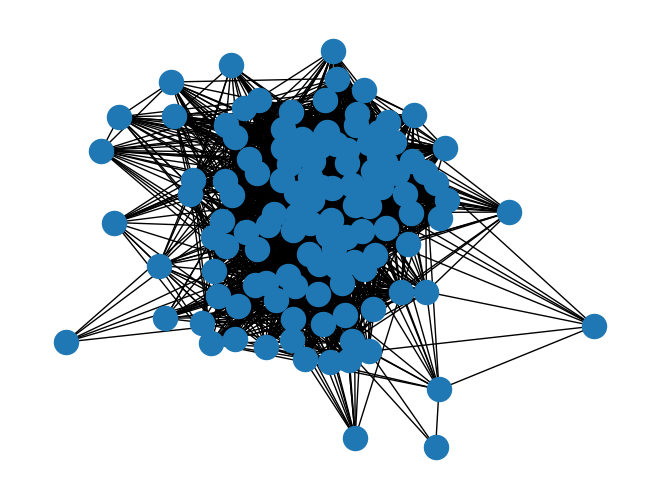

In [11]:
nx.draw(net95_1)

In [12]:
# install nx_altair
# !pip install nx_altair

In [13]:
# install vegafusion
# !pip install "vegafusion[embed]>=1.5.0"

In [14]:
import matplotlib.pyplot as plt
import nx_altair as nxa
alt.data_transformers.enable("vegafusion")

pos=nx.kamada_kawai_layout(net95_1,scale=5)



chart = nxa.draw_networkx(
    G=net95_1,
    pos=pos,
    node_color='isPartyInGov:N',
    cmap='accent',
    edge_color='lightgrey'
)
chart

alt.LayerChart(...)

In [15]:
# Get the node layer and edges
edges, nodes = chart.layer

# Build a brush
brush = alt.selection_interval()

# Condition nodes based on brush

nodes = nodes.encode(
    ).transform_filter(
    brush
).properties(
    width=500,
    height=600,
)

# bar shows selected nodes.
bars = alt.Chart(nodes.data).mark_bar().encode(
    alt.Y('count()',title='', scale=alt.Scale(domain=(0,120))),
    alt.X('party').sort('-y'),
    color=alt.Color('party', legend=None)
).add_params(
    brush
)

alt.hconcat(edges+nodes, bars)

alt.HConcatChart(...)

## <div class="alert alert-danger" role="alert">Looking for Communities</div>

We can not go very far with the previous plot; the next step is to find out if actually there are communities emerging from the relationships. Let's compute some basic net stats to see if we can suspect the existence of communities.

In [16]:
# (average) probability that two of your connections are also connected.
nx.transitivity(net95_1)

0.6870013554096792

In [17]:
# (average) probability that all your connections are connected
nx.average_clustering(net95_1,count_zeros=False)

0.6893858266780076

In [18]:
# the amout of maximal cliques
len(list(nx.find_cliques(net95_1)))

1048

In [19]:
# The size of the maximal clique
maxsize_clique=max(len(c) for c in nx.find_cliques_recursive(net95_1))
maxsize_clique

52

With this information, we can suspect nodes are organised into communities.

There are several algorithms for comunities detection. Let's use the [Louvain algorithm](https://arxiv.org/abs/0803.0476):

In [20]:
# computing
legisLouvain=nx.community.louvain_communities(net95_1, seed=123)

# creating attribute
legisLouvain_attr={z:x for x,y  in enumerate(legisLouvain) for z in y }

# an attribute to the node
nx.set_node_attributes(net95_1, legisLouvain_attr,'louvain')

# how many?
print('comunities found:',len(legisLouvain))

comunities found: 6


The community label has been assigned to the nodes, let's recover the attributes as a data frame again:

In [21]:
net95_1_NodeData=pd.DataFrame.from_dict(net95_1.nodes, orient='index')
net95_1_NodeData.iloc[:,-5:]

betweenness  closeness  eigenvector  isPartyInGov  louvain
00046218     0.008172   0.753165     0.132632             1        0
07238522     0.009132   0.730061     0.120487             0        5
08201401     0.006847   0.721212     0.119679             0        2
05847587     0.018071   0.793333     0.136519             1        0
32785850     0.011287   0.743750     0.122160             0        1
...               ...        ...          ...           ...      ...
07586258     0.009202   0.743750     0.125720             0        2
07194374     0.003429   0.589109     0.048808             1        3
08772985     0.000057   0.416084     0.001550             0        3
29233392     0.012056   0.762821     0.130147             1        0
17906056     0.002558   0.616580     0.076054             1        0

[120 rows x 5 columns]

Let's create a viz:

In [22]:
# position of nodes
nodePos=nx.spring_layout(net95_1,k=0.5)

# drawing
chart = nxa.draw_networkx(G=net95_1,
                          pos=nodePos,
                          edge_color='grey',
                          width='weight',
                          alpha=0.6,
                          node_size='isPartyInGov:N',
                          node_color='louvain:N',
                          cmap='set1',
                          linewidths=0,
                          node_tooltip=['label','party'])
chart.properties(
    width=600,
    height=600,
).interactive()

alt.LayerChart(...)

The library **netgraph** moves the nodes if you have communities:

In [23]:
# !pip install netgraph

/Users/JoseManuel/opt/anaconda3/envs/ASIES/lib/python3.11/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


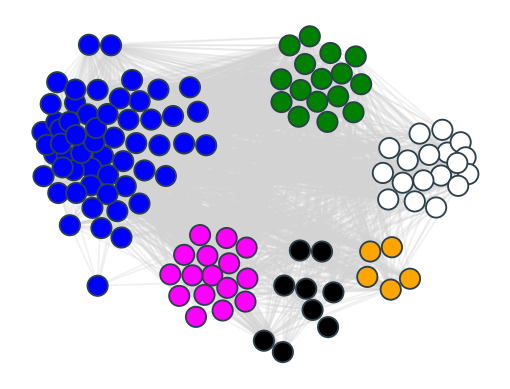

In [24]:
# custom colors
community_to_color = {0 : 'blue', 1 : 'orange',2 : 'green',3 : 'white', 4:'black', 5:'magenta'}
# color dict
custom_node_color = {node: community_to_color[community_id] for node, community_id in legisLouvain_attr.items()}

from netgraph import Graph
Graph(net95_1,
      node_layout='community',edge_color='lightgrey',edge_alpha=0.3,edge_width=0.5,
      node_layout_kwargs=dict(node_to_community=legisLouvain_attr),
      node_color=custom_node_color)

You can try **hives** if we are intested in displaying interactions:

In [25]:
# !pip install hiveplotlib

In [26]:
from hiveplotlib import hive_plot_n_axes
from hiveplotlib.converters import networkx_to_nodes_edges
from hiveplotlib.node import split_nodes_on_variable
from hiveplotlib.viz import hive_plot_viz

# setup
## convert from networkx
nodes, edges = networkx_to_nodes_edges(net95_1)
## organize nodes into communities
communities_dict = split_nodes_on_variable(nodes, variable_name="louvain")
nodes_by_community_toAxes = list(communities_dict.values())
# amount of communities
amountOf_communities=len(nodes_by_community_toAxes)

Time to plot:

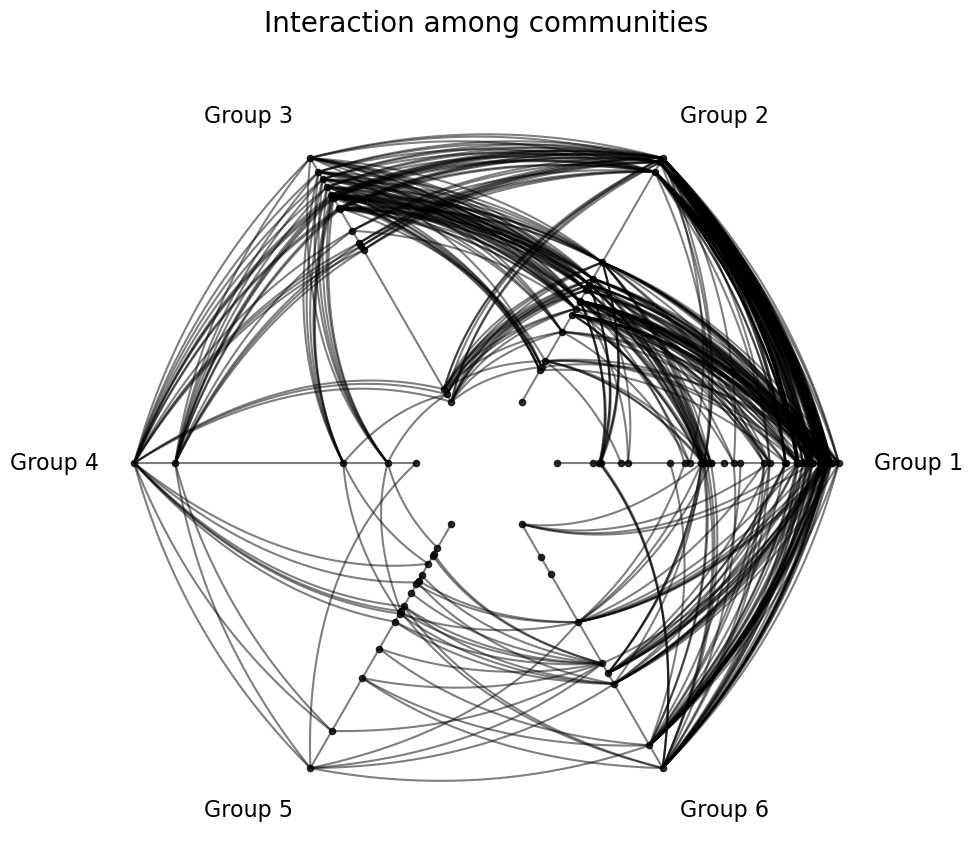

In [27]:
hp = hive_plot_n_axes(node_list=nodes,
                      edges=edges,
                      axes_assignments=nodes_by_community_toAxes,
                      sorting_variables=["eigenvector"] * amountOf_communities
)
fig, ax = hive_plot_viz(hp)
ax.set_title("Interaction among communities", y=1.05, size=20)
plt.show()

We could add some color:

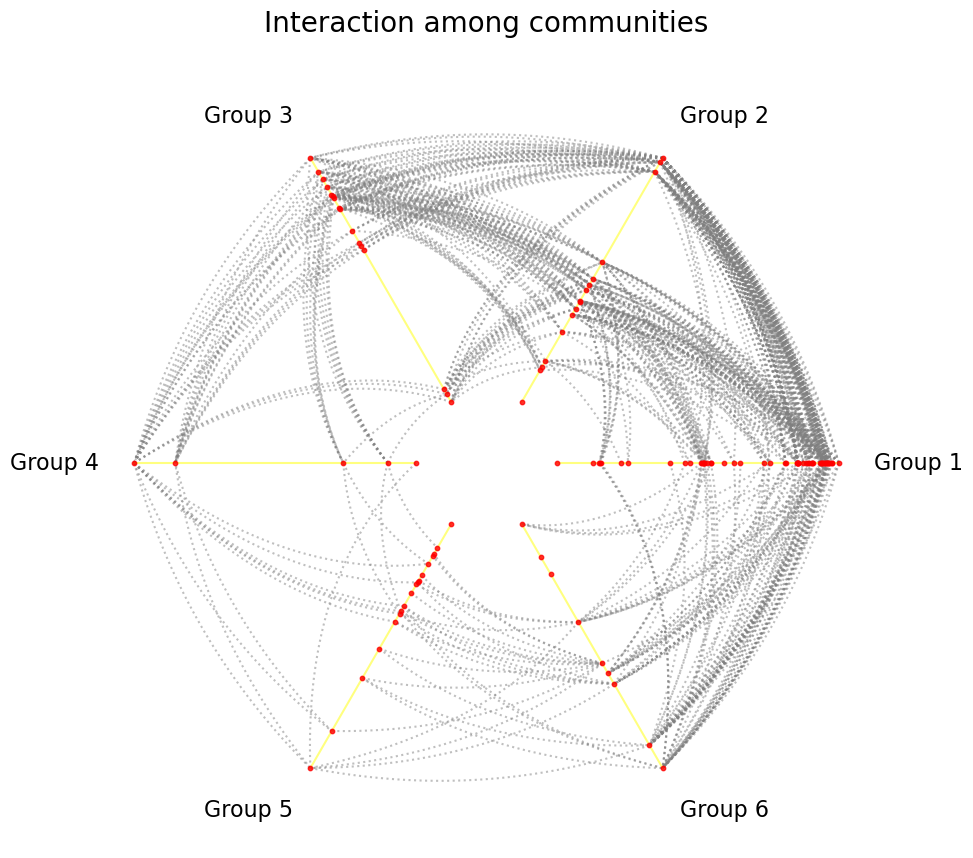

In [28]:
fig, ax = hive_plot_viz(
    hp,
    node_kwargs={"color": "red", "s": 10},
    axes_kwargs={"color": "yellow"},
    color="grey",
    ls="dotted"
)
ax.set_title("Interaction among communities", y=1.05, size=20)
plt.show()

This library allows you to reveal within communities interaction:

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_1481/617131583.py:1: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(node_list=nodes,
/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_1481/617131583.py:1: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(node_list=nodes,
/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_1481/617131583.py:1: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(node_list=nodes,
/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_1481/617131583

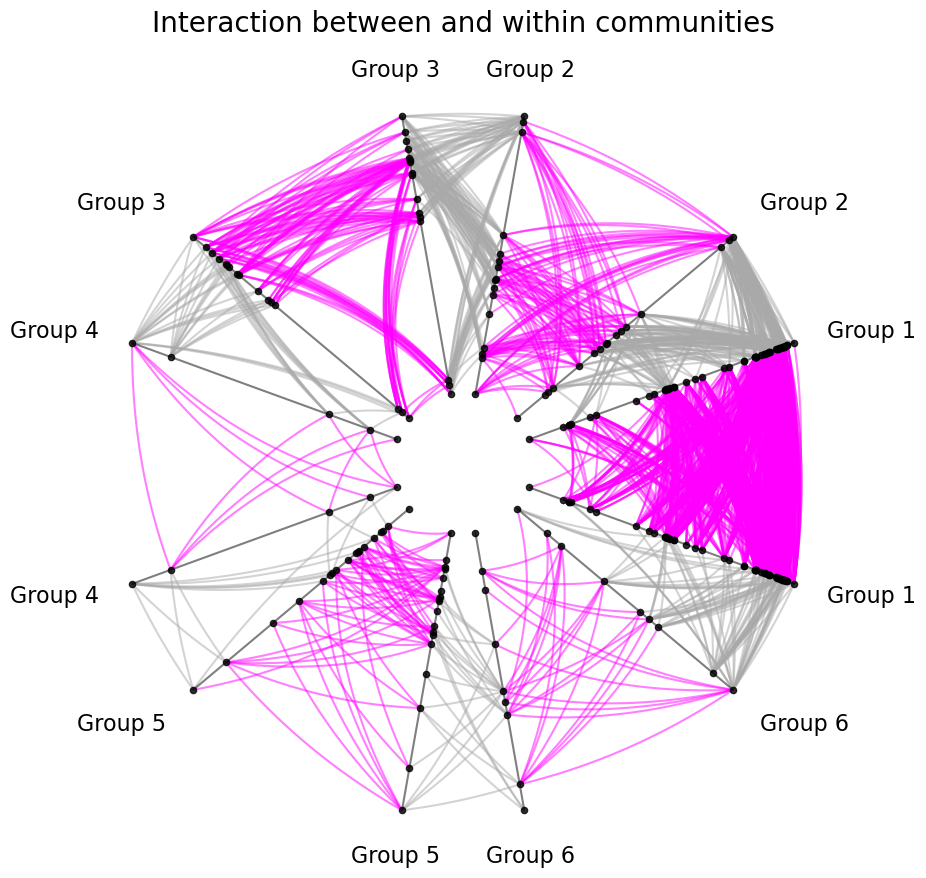

In [29]:
hp = hive_plot_n_axes(node_list=nodes,
                      edges=edges,
                      axes_assignments=nodes_by_community_toAxes,
                      sorting_variables=["eigenvector"] * amountOf_communities,
                      repeat_axes=[True]*amountOf_communities,
                      all_edge_kwargs={"color": "darkgrey"},
                      repeat_edge_kwargs={"color": "magenta"})
fig, ax = hive_plot_viz(hp)
ax.set_title("Interaction between and within communities", y=1.05, size=20)
plt.show()

Finally, let's use heatmaps:

In [30]:
# import networkx as nx
# net95_1=nx.read_gexf("cospon_9596.gexf")
nodelist = list(net95_1.nodes)
A = nx.to_numpy_array(net95_1, nodelist=nodelist)
A

array([[0., 2., 1., ..., 0., 3., 2.],
       [2., 0., 2., ..., 0., 1., 0.],
       [1., 2., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 1., 1., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.]])

Let's use **graspologic**. Notice it requires a particular version of scipy.

In [31]:
# !pip install scipy==1.10.1

In [32]:
# !pip install graspologic

**I recommend we restart the session after the last installations.**

<Axes: >

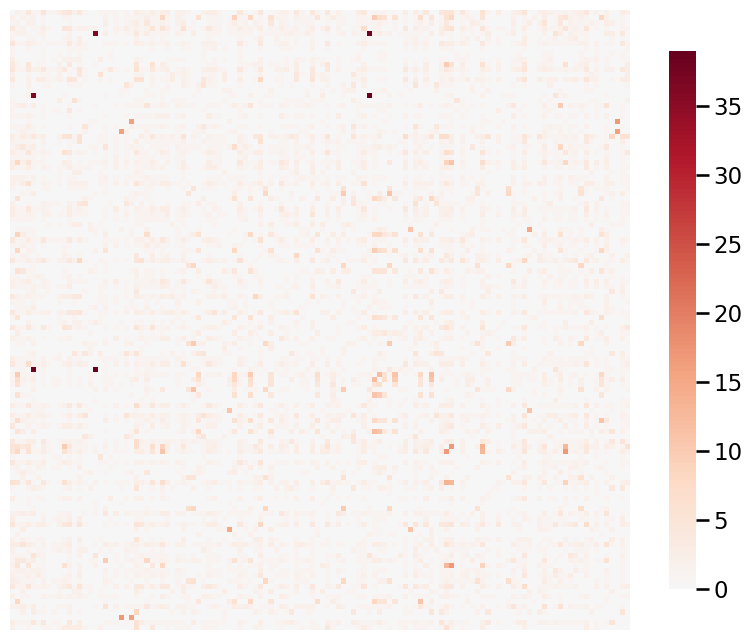

In [33]:
from graspologic.plot import heatmap

heatmap(A, cbar=True)

We can not say very much from that plot. But, let me recover the party of the legislators:

In [34]:
isPartyInGov_Values=[val for k,val in nx.get_node_attributes(net95_1, 'party').items()]
isPartyInGov_Values

['CAMBIO 90 - NUEVA MAYORIA',
 'UNION POR EL PERU',
 'ACCION POPULAR',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CODE - PAIS POSIBLE',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'FRENTE INDEPENDIENTE MORALIZADOR',
 'CODE - PAIS POSIBLE',
 'CAMBIO 90 - NUEVA MAYORIA',
 'IZQUIERDA UNIDA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'FRENTE POPULAR AGRICOLA FIA DEL PERU',
 'RENOVACION',
 'CAMBIO 90 - NUEVA MAYORIA',
 'RENOVACION',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'FRENTE INDEPENDIENTE MORALIZADOR',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CODE - PAIS POSIBLE',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'CAMBIO 90 - NUEVA MAYORIA',
 'FRENTE INDEPENDIENTE MORALIZADOR',
 'CAMBIO 90 - NUEVA MAYORIA',
 'PARTIDO APRISTA PERUANO

Then, this nice heatplot appears:

<Axes: >

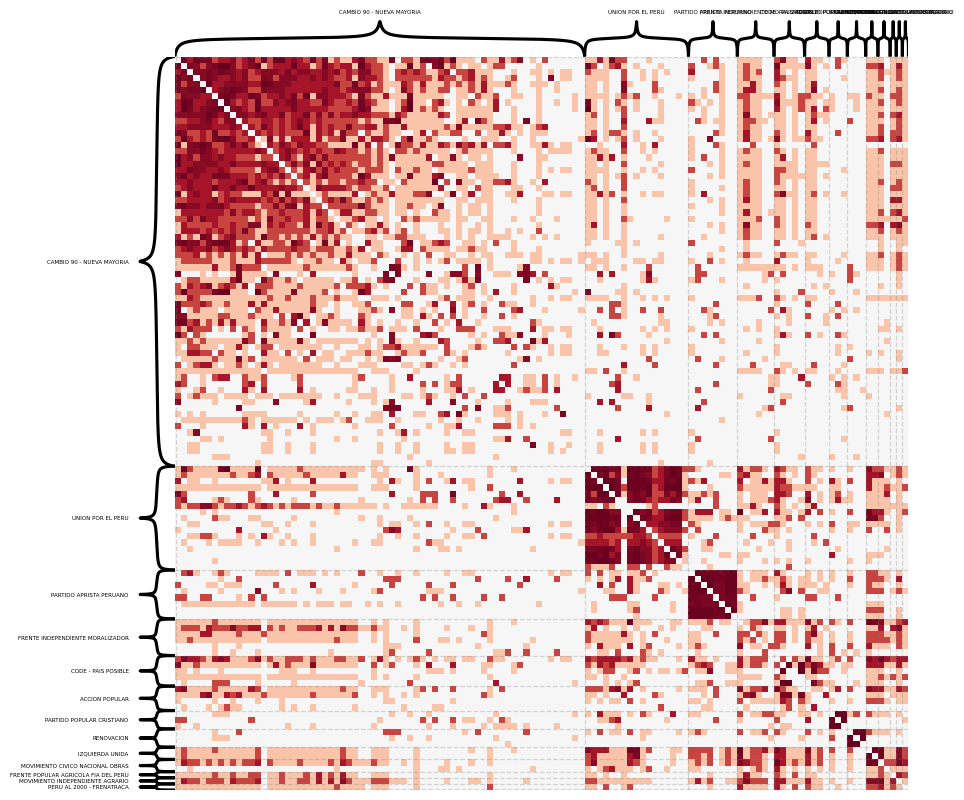

In [35]:
heatmap(A, inner_hier_labels=isPartyInGov_Values, sort_nodes=True, cbar=False,hier_label_fontsize=4,transform='simple-all')

Finally, we could save the net with all the attributes added:

In [36]:
# nx.write_graphml(net95_1,'net95_1.graphml')